# Lab 01

## By Alicia Rüegg, Jonas Huber, Arik Guggenheim

* Much list
* Very füdli

In [5]:
"""
Cluster artists based on the words in their lyrics
Data from kaggle
Format data with create_data_kaggle.py
"""

__author__ = 'don.tuggener@zhaw.ch'

import numpy
import json
import pdb
import re
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.feature_extraction.text import TfidfVectorizer
from matplotlib import pyplot as plt


def scale_plot_size(factor=1.5):
    import matplotlib as mpl
    default_dpi = mpl.rcParamsDefault['figure.dpi']
    mpl.rcParams['figure.dpi'] = default_dpi*factor


def plot_dendrogram(clustered, artists):
   """ Plot a dendrogram from the hierarchical clustering of the artist lyrics """
   plt.figure(figsize=(10, 25))
   #plt.figure(figsize=(25, 10))
   plt.title('Hierarchical Clustering Dendrogram')
   plt.xlabel('Distance')  # this' but the label of the whole axis!
   plt.ylabel('Artists')
   plt.tight_layout()
   dendrogram(clustered,
           color_threshold=1.45,
           leaf_font_size=8.,  # font size for the x axis labels
           labels = artists,
           orientation = 'left',
           )
   plt.show()
   plt.clf()



def words_per_artist(artist_lyrics, lyrics_tfidf_matrix, ix2word, n=10):
    """ 
    For each artist, print the most highly weighted words acc. to TF IDF 
    Print n words that are above the mean weight 
    """
    # TODO implement it




In [6]:
print('Loading data')
artist2genre = json.load(
    open('data/artist2genre_kaggle.json', 'r', encoding='utf-8'))
artist_lyrics = json.load(
    open('data/artist_lyrics_kaggle.json', 'r', encoding='utf-8'))
# Custom tokenization to remove numbers etc.
lyrics = [' '.join(re.findall('[A-Za-z]+', l))
            for l in artist_lyrics.values()]

Loading data


Vectorizing with TF IDF
Distinct words per artist
Clustering
Plotting


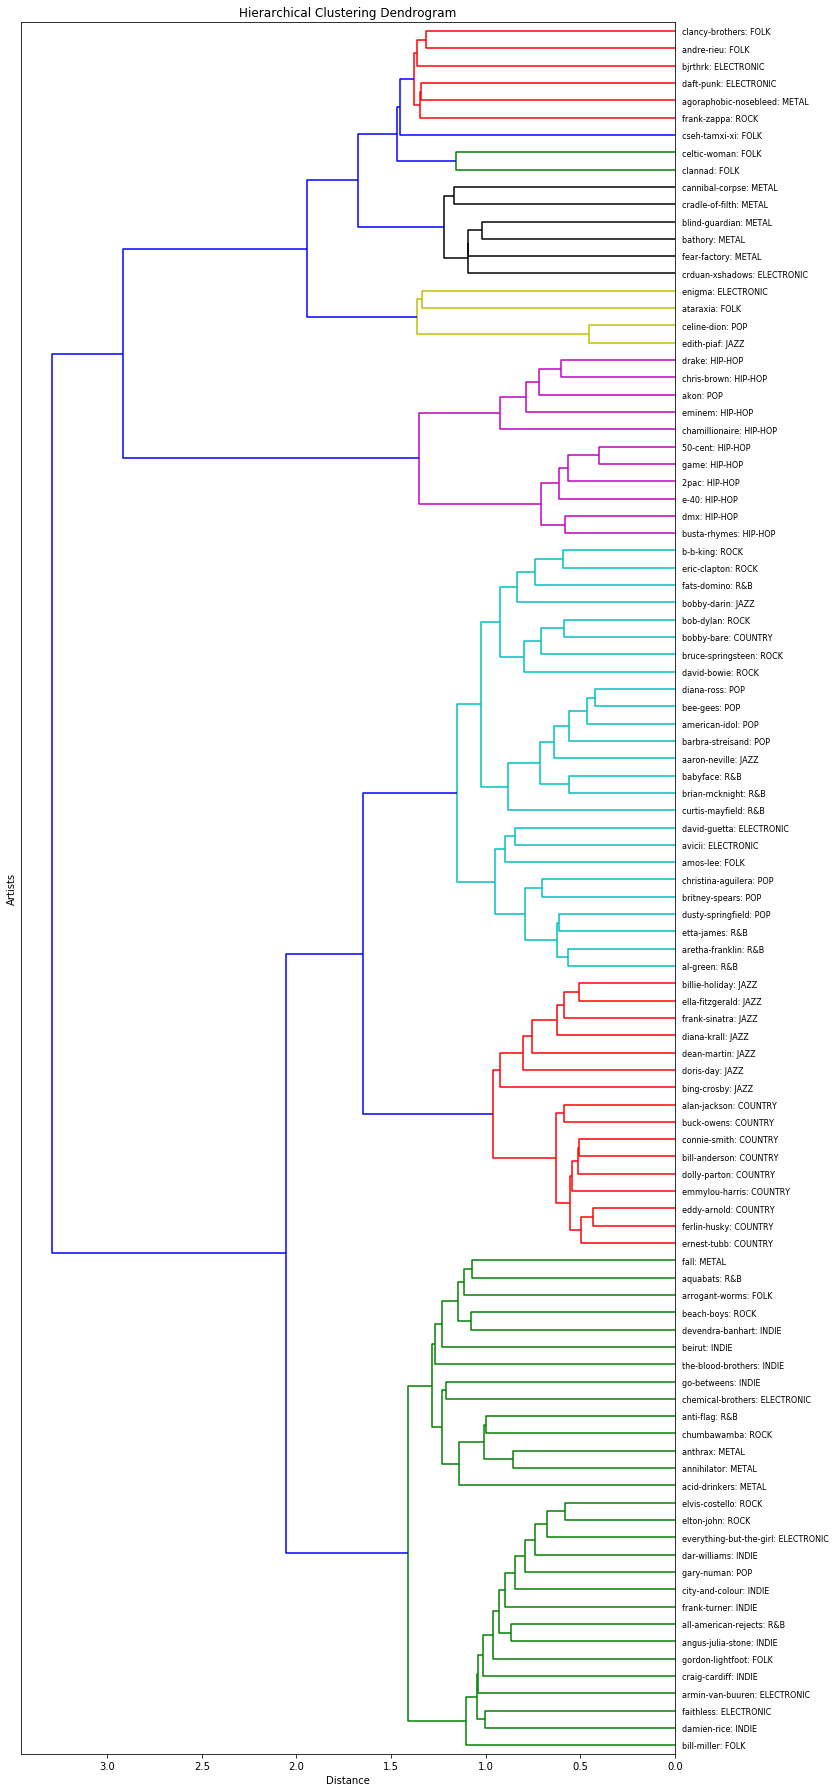

<Figure size 432x288 with 0 Axes>

In [7]:
print('Vectorizing with TF IDF')
# Vectorize the song lyrics
vectorizer = TfidfVectorizer(analyzer='word', stop_words='english')
lyrics_tfidf_matrix = vectorizer.fit_transform(lyrics)
ix2word = vectorizer.get_feature_names()

print('Distinct words per artist')
words_per_artist(artist_lyrics, lyrics_tfidf_matrix, ix2word)

print('Clustering')
clustered = linkage(lyrics_tfidf_matrix.toarray(), method='ward')


print('Plotting')
artist_names = [a+': '+artist2genre[a].upper()
                for a in list(artist_lyrics.keys())]
plot_dendrogram(clustered, artist_names)

# This is a test